# Business Case #2 - Predict Hotel Booking Cancellations

## Authors:
#### Débora Santos (m20200748), Diana Furtado (m20200590),Pedro Henrique Medeiros (m20200742), Rebeca Pinheiro (m20201096)

#### Group D - D4B Consulting

### Installing and import packages

Maybe it will be necessary install some 'special' packages to this notebook works. 

Please follow the next cells and check if it's necessary

In [ ]:
#Install package pandas profiling to the visualizations
!pip install pandas-profiling

In [ ]:
#Install package to run Phik correlation
!pip install phik==0.10.0

In [1]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
from pandas_profiling import ProfileReport 
%config InlineBackend.figure_format = 'retina' 
from scipy.stats import iqr as IQR
from collections import Counter

from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
import phik
import matplotlib.cm as cm
from sklearn.manifold import TSNE

#outliers detection
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier

from os.path import join


from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Seeting seaborn style
sns.set()

Collect initial data

In [2]:
#import dataset
df = pd.read_csv('H2.csv',sep=",")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Describe, explore and assess data quality

In [3]:
# First look at the dataframe
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [4]:
# First look at the dataframe
df.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07
79329,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# Data types and null values verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [6]:
# Summary statistics for all variables
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [7]:
#PANDAS PROFILING.

prof = ProfileReport(df)
prof.to_file(output_file='H2_Profile.html')

In [8]:
# Replace possible empty values with NaN
df.replace("", np.nan, inplace=True)

# Function to show missing values and their percentages
def missing_data(df):
    l = []
    for col in df.columns:
        missing = df[col].isnull().sum(axis=0)
        percentage = missing/df.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

# Check the percentage of missing values
df_missing = missing_data(df)
df_missing = df_missing[df_missing['missing']>0]
df_missing

,Feature,missing,percentage
12,Country,24,0.030253
9,Children,4,0.005042


In [9]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
8,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
10,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
12,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79312,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42,NULL,0,Transient,82.35,0,1,Check-Out,2017-09-04


#### Some preprocessing

In [10]:
# Make a copy of the dataframe
df1 = df.copy()
# Drop rows with missing values (28 rows, representing 0.035% of the dataset - including Children=NA)
df1 = df1.dropna()

In [11]:
# Drop ADR == 5400 (1 row)
df1 = df1[df1['ADR']!=5400]

In [12]:
# Drop the reservations with 0 adults (382 rows (0.48% of the dataset))
df1 = df1[df1['Adults']!=0]
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Some feature engineering

In [13]:
# Creation the 2 new variables
# Creates two new variables Days_before_cancel and Days_until_cancel
df1['ArrivalDate'] = df1['ArrivalDateYear'].map(str) + '-' + df['ArrivalDateMonth'].map(str) + '-' + df['ArrivalDateDayOfMonth'].map(str)
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-July-1
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,2015-July-1
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,2015-July-1
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,2015-July-1
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,2015-July-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-August-30
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-August-31
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-August-31
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-August-31


In [14]:
# Transform ReservationStatusDate and ArrivalDate to datetime
df1['ReservationStatusDate'] =  pd.to_datetime(df1['ReservationStatusDate'])
df1['ArrivalDate'] =  pd.to_datetime(df1['ArrivalDate'])
# Creates new variable DateDifference (difference between the Arrival date and the last status update date)
df1['DateDifference'] = (pd.DatetimeIndex(df1['ArrivalDate'])-pd.DatetimeIndex(df1['ReservationStatusDate'])).days

In [15]:
df1['Days_before_cancel'] = np.where(df1['ReservationStatus']=='Canceled', df1['DateDifference'], 0)

In [16]:
# Creates new variable Days_until_cancel (LeadTime minus DateDifference)
df1['Days_until_cancel'] = np.where(df1['ReservationStatus']=='Canceled', df1['LeadTime'].sub(df1['DateDifference'], axis=0), 0)
df1.head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,DateDifference,Days_before_cancel,Days_until_cancel
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03,2015-07-01,-2,0,0
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01,0,0,88
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01,62,62,3
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23,2015-07-01,8,8,84
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02,91,91,9


In [17]:
# We decided to drop variables DateDifference, ArrivalDate, ArrivalDateYear, ArrivalDateWeekNumber, ArrivalDateDayOfMonth as they won't be relevant for this analysis
# However we decided to keep ArrivalDateMonth
# We dropped variable Country as it has quality issues
df1.drop(['ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','DateDifference','ArrivalDate','Country'], axis=1, inplace=True)
df1

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Days_before_cancel,Days_until_cancel
0,0,6,July,0,2,1,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,0,0
1,1,88,July,0,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,0,88
2,1,65,July,0,4,1,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,62,3
3,1,92,July,2,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,8,84
4,1,100,July,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,91,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,August,2,5,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,0
79326,0,102,August,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,0
79327,0,34,August,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,0
79328,0,109,August,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,0


In [18]:
# Room type - Creates a new feature where 1 if ReservedRoomType=AssignedRoomType; 0 otherwise
df1['RoomType_change'] = np.where(df1['ReservedRoomType'] == df1['AssignedRoomType'], 1, 0)
df1

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Days_before_cancel,Days_until_cancel,RoomType_change
0,0,6,July,0,2,1,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,0,0,1
1,1,88,July,0,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,0,88,1
2,1,65,July,0,4,1,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,62,3,1
3,1,92,July,2,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,8,84,1
4,1,100,July,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,91,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,August,2,5,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,0,1
79326,0,102,August,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,0,1
79327,0,34,August,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,0,1
79328,0,109,August,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,0,1


In [19]:
# Define metric features (INCLUIR AS VARIAVEIS CRIADAS)
metric_features = ['LeadTime','ADR','DaysInWaitingList','TotalOfSpecialRequests','Adults','Children','Babies','BookingChanges','PreviousCancellations','PreviousBookingsNotCanceled','RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights','Days_before_cancel','Days_until_cancel']
# Define non-metric features
non_metric_features = df1.columns.drop(metric_features).to_list()

In [20]:
#Check the non_metric_features
non_metric_features

['IsCanceled',
 'ArrivalDateMonth',
 'Meal',
 'MarketSegment',
 'DistributionChannel',
 'IsRepeatedGuest',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'ReservationStatus',
 'ReservationStatusDate',
 'RoomType_change']

In [21]:
#Check the metric_features
metric_features

['LeadTime',
 'ADR',
 'DaysInWaitingList',
 'TotalOfSpecialRequests',
 'Adults',
 'Children',
 'Babies',
 'BookingChanges',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'RequiredCarParkingSpaces',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Days_before_cancel',
 'Days_until_cancel']

### Correlation

#### In order to perform the model is useless and harmful to keep variables that are either highly or lowly correlated with each other. In the first case because it leads to redudancy of the data, the second because lowly correlated columns will have tha same value among all the clusters and give no information to our cluster analysis. (arrumar comentário)

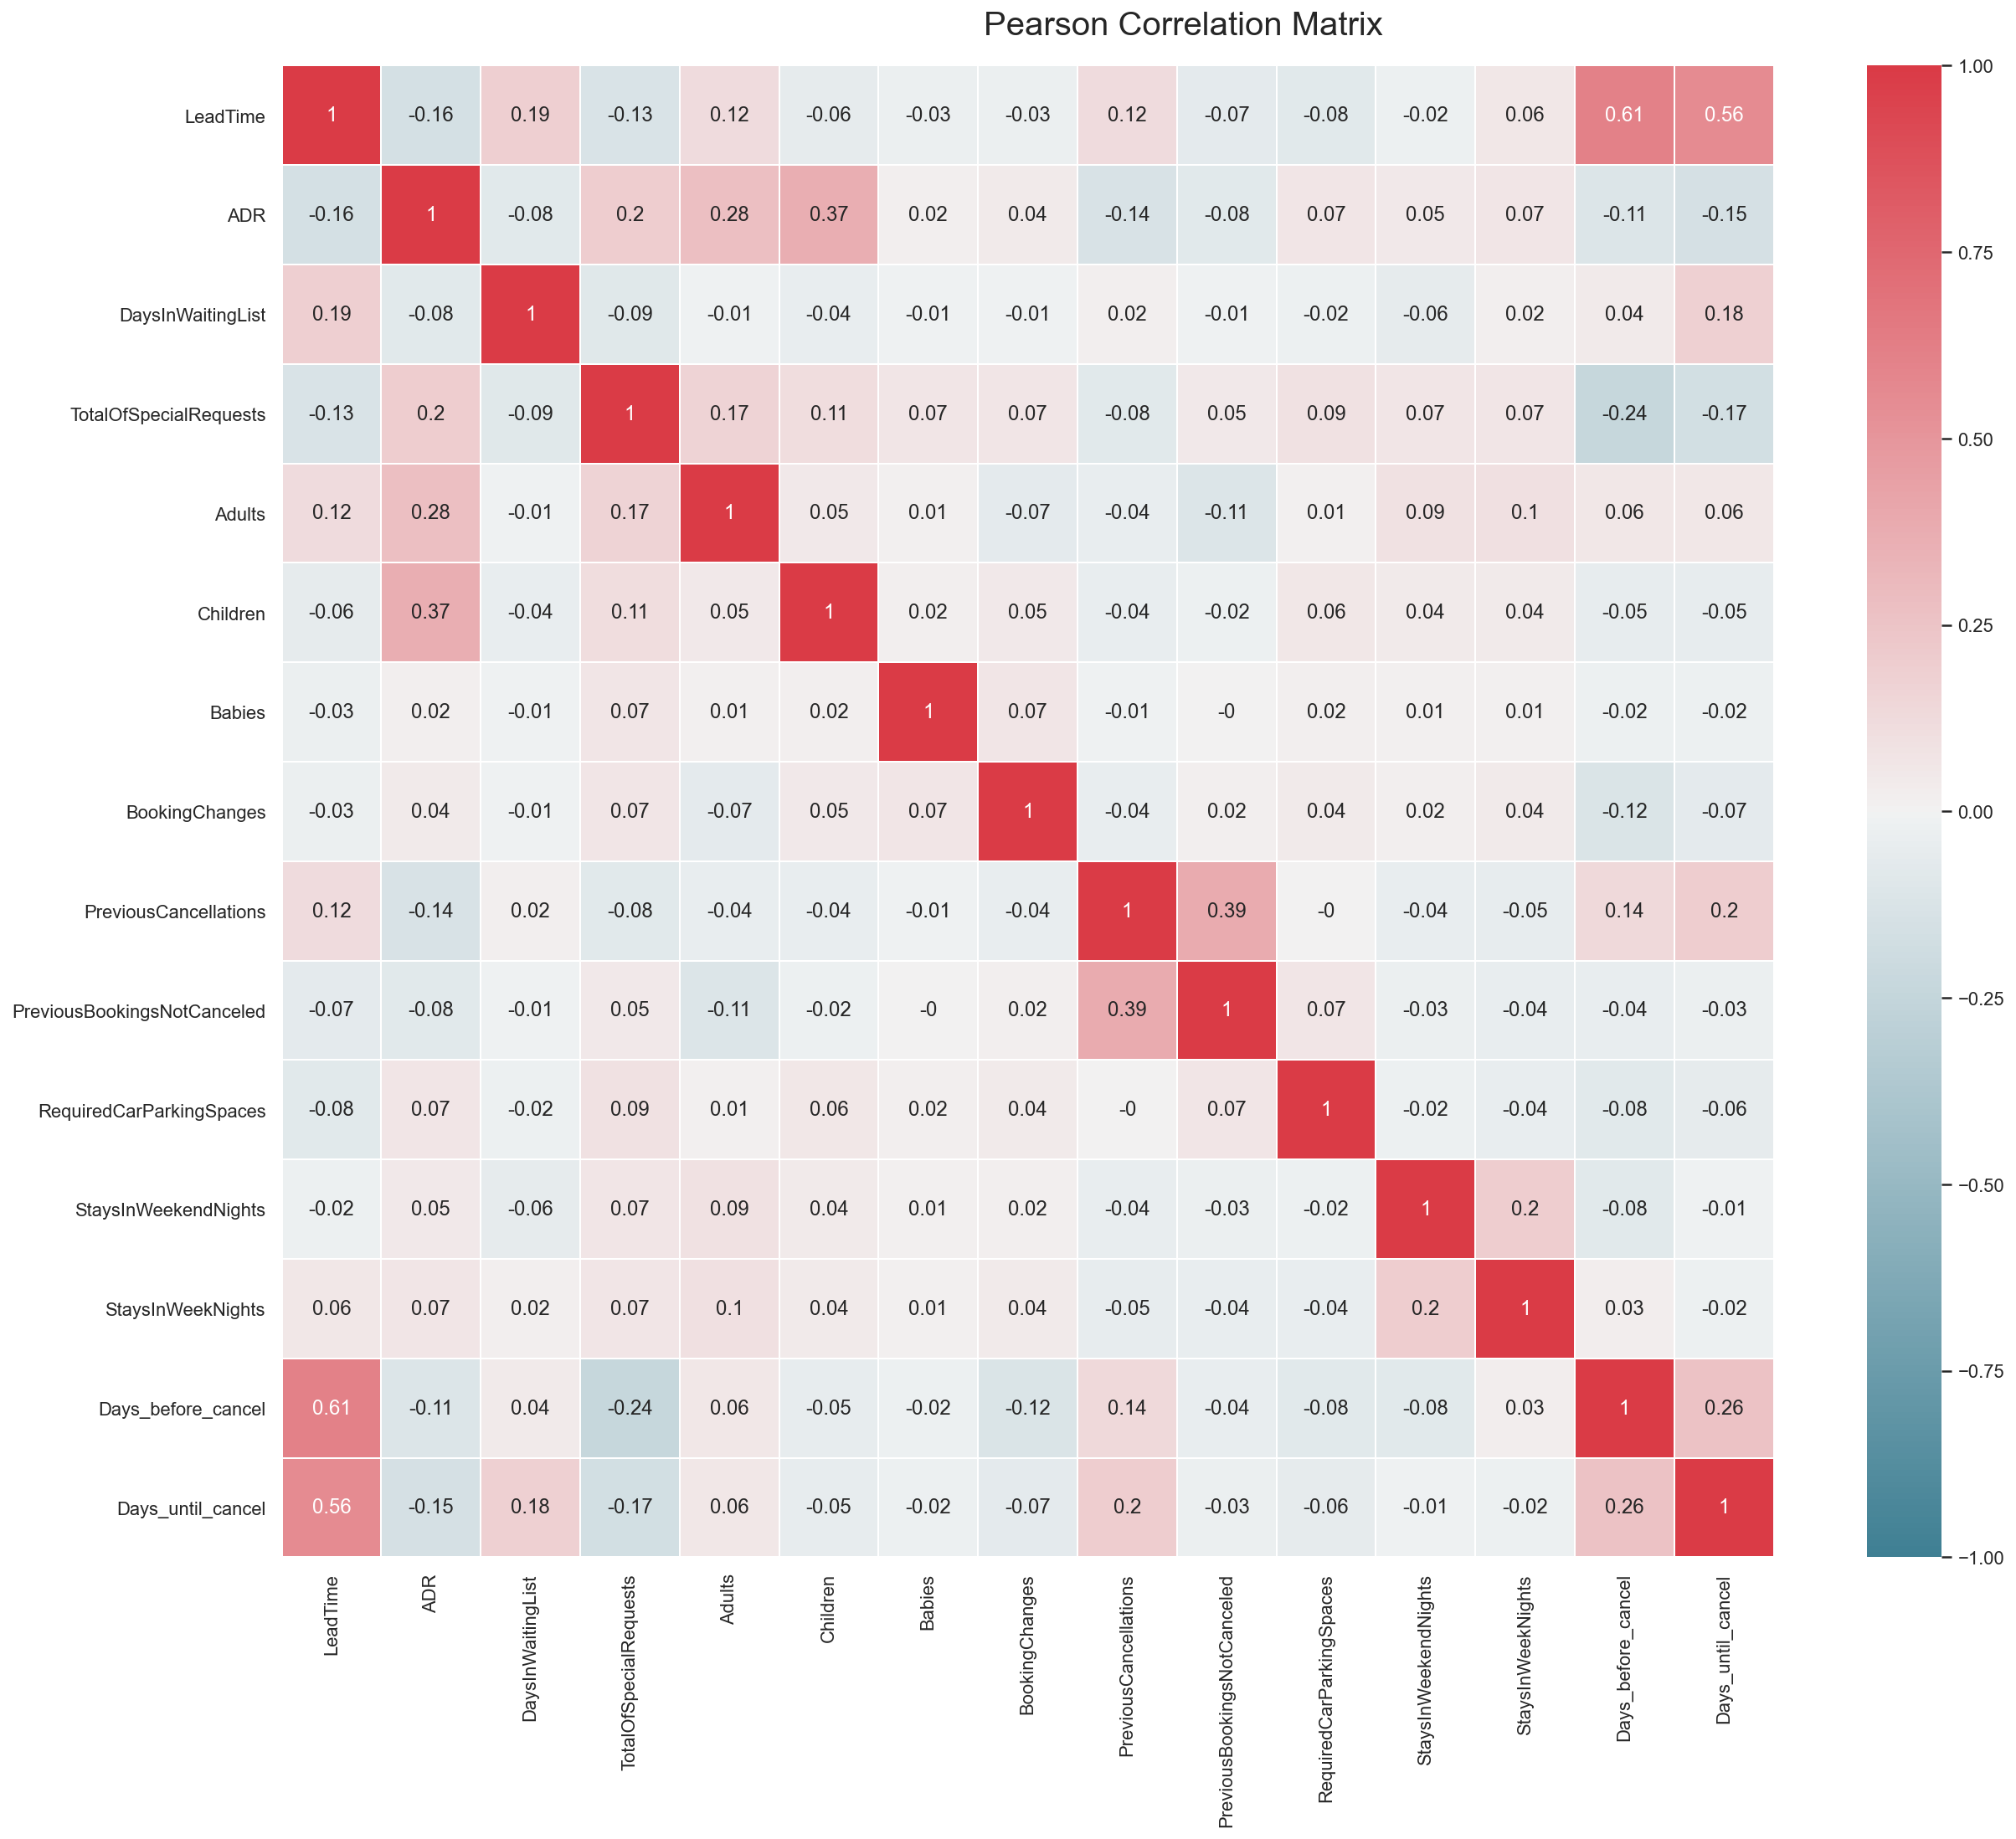

In [22]:
# Pearson Correlation matrix

# Set correlation matrix
correlation = np.round(df1[metric_features].corr(),2)
## Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation, annot = correlation.values,cmap=sns.diverging_palette(220, 10, as_cmap=True), 
             vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Days_before_cancel', 'Days_until_cancel', 'RoomType_change']


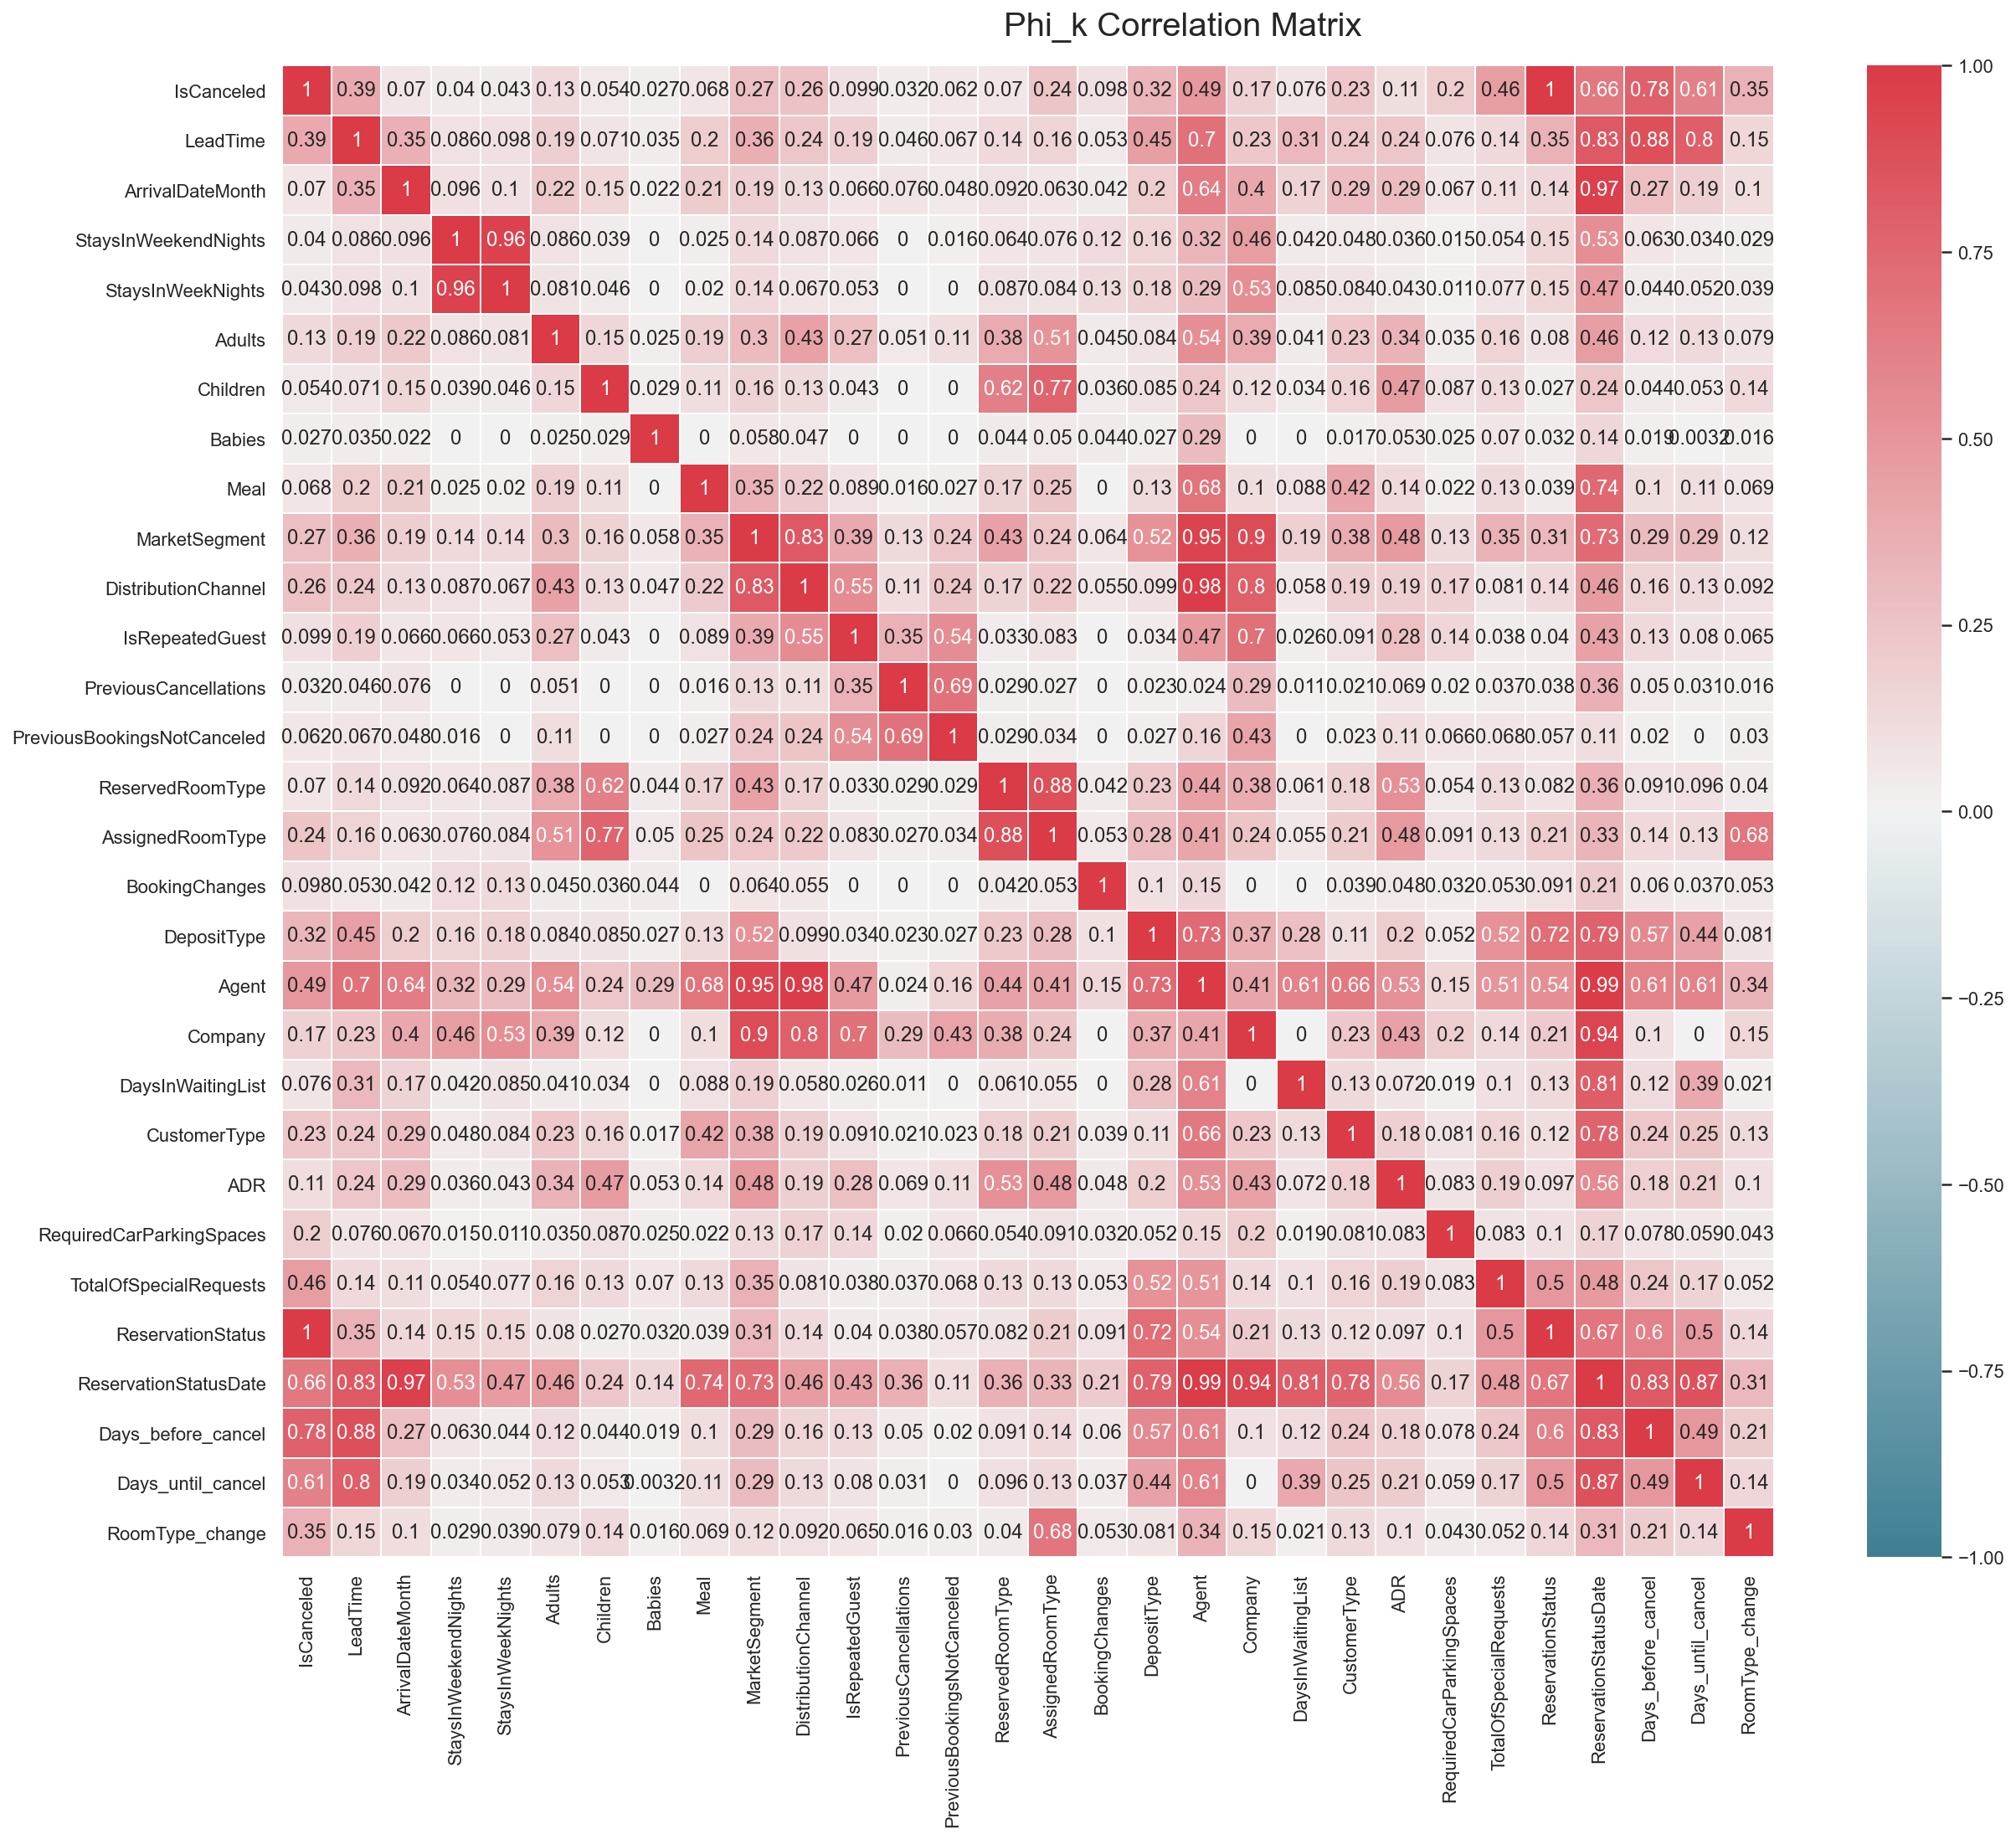

In [23]:
# Phik Correlation matrix
# Set correlation matrix
correlation2 = df1.phik_matrix()
# Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation2, annot = correlation2.values, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Phi_k Correlation Matrix", fontsize=20)

plt.show()

#### The next cell, we re-run the phik correlation matrix after drop the variables high correlated

interval columns not set, guessing: ['IsCanceled', 'IsRepeatedGuest', 'LeadTime', 'ADR', 'DaysInWaitingList', 'TotalOfSpecialRequests', 'Adults', 'Children', 'Babies', 'BookingChanges', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights', 'Days_before_cancel', 'Days_until_cancel', 'RoomType_change']


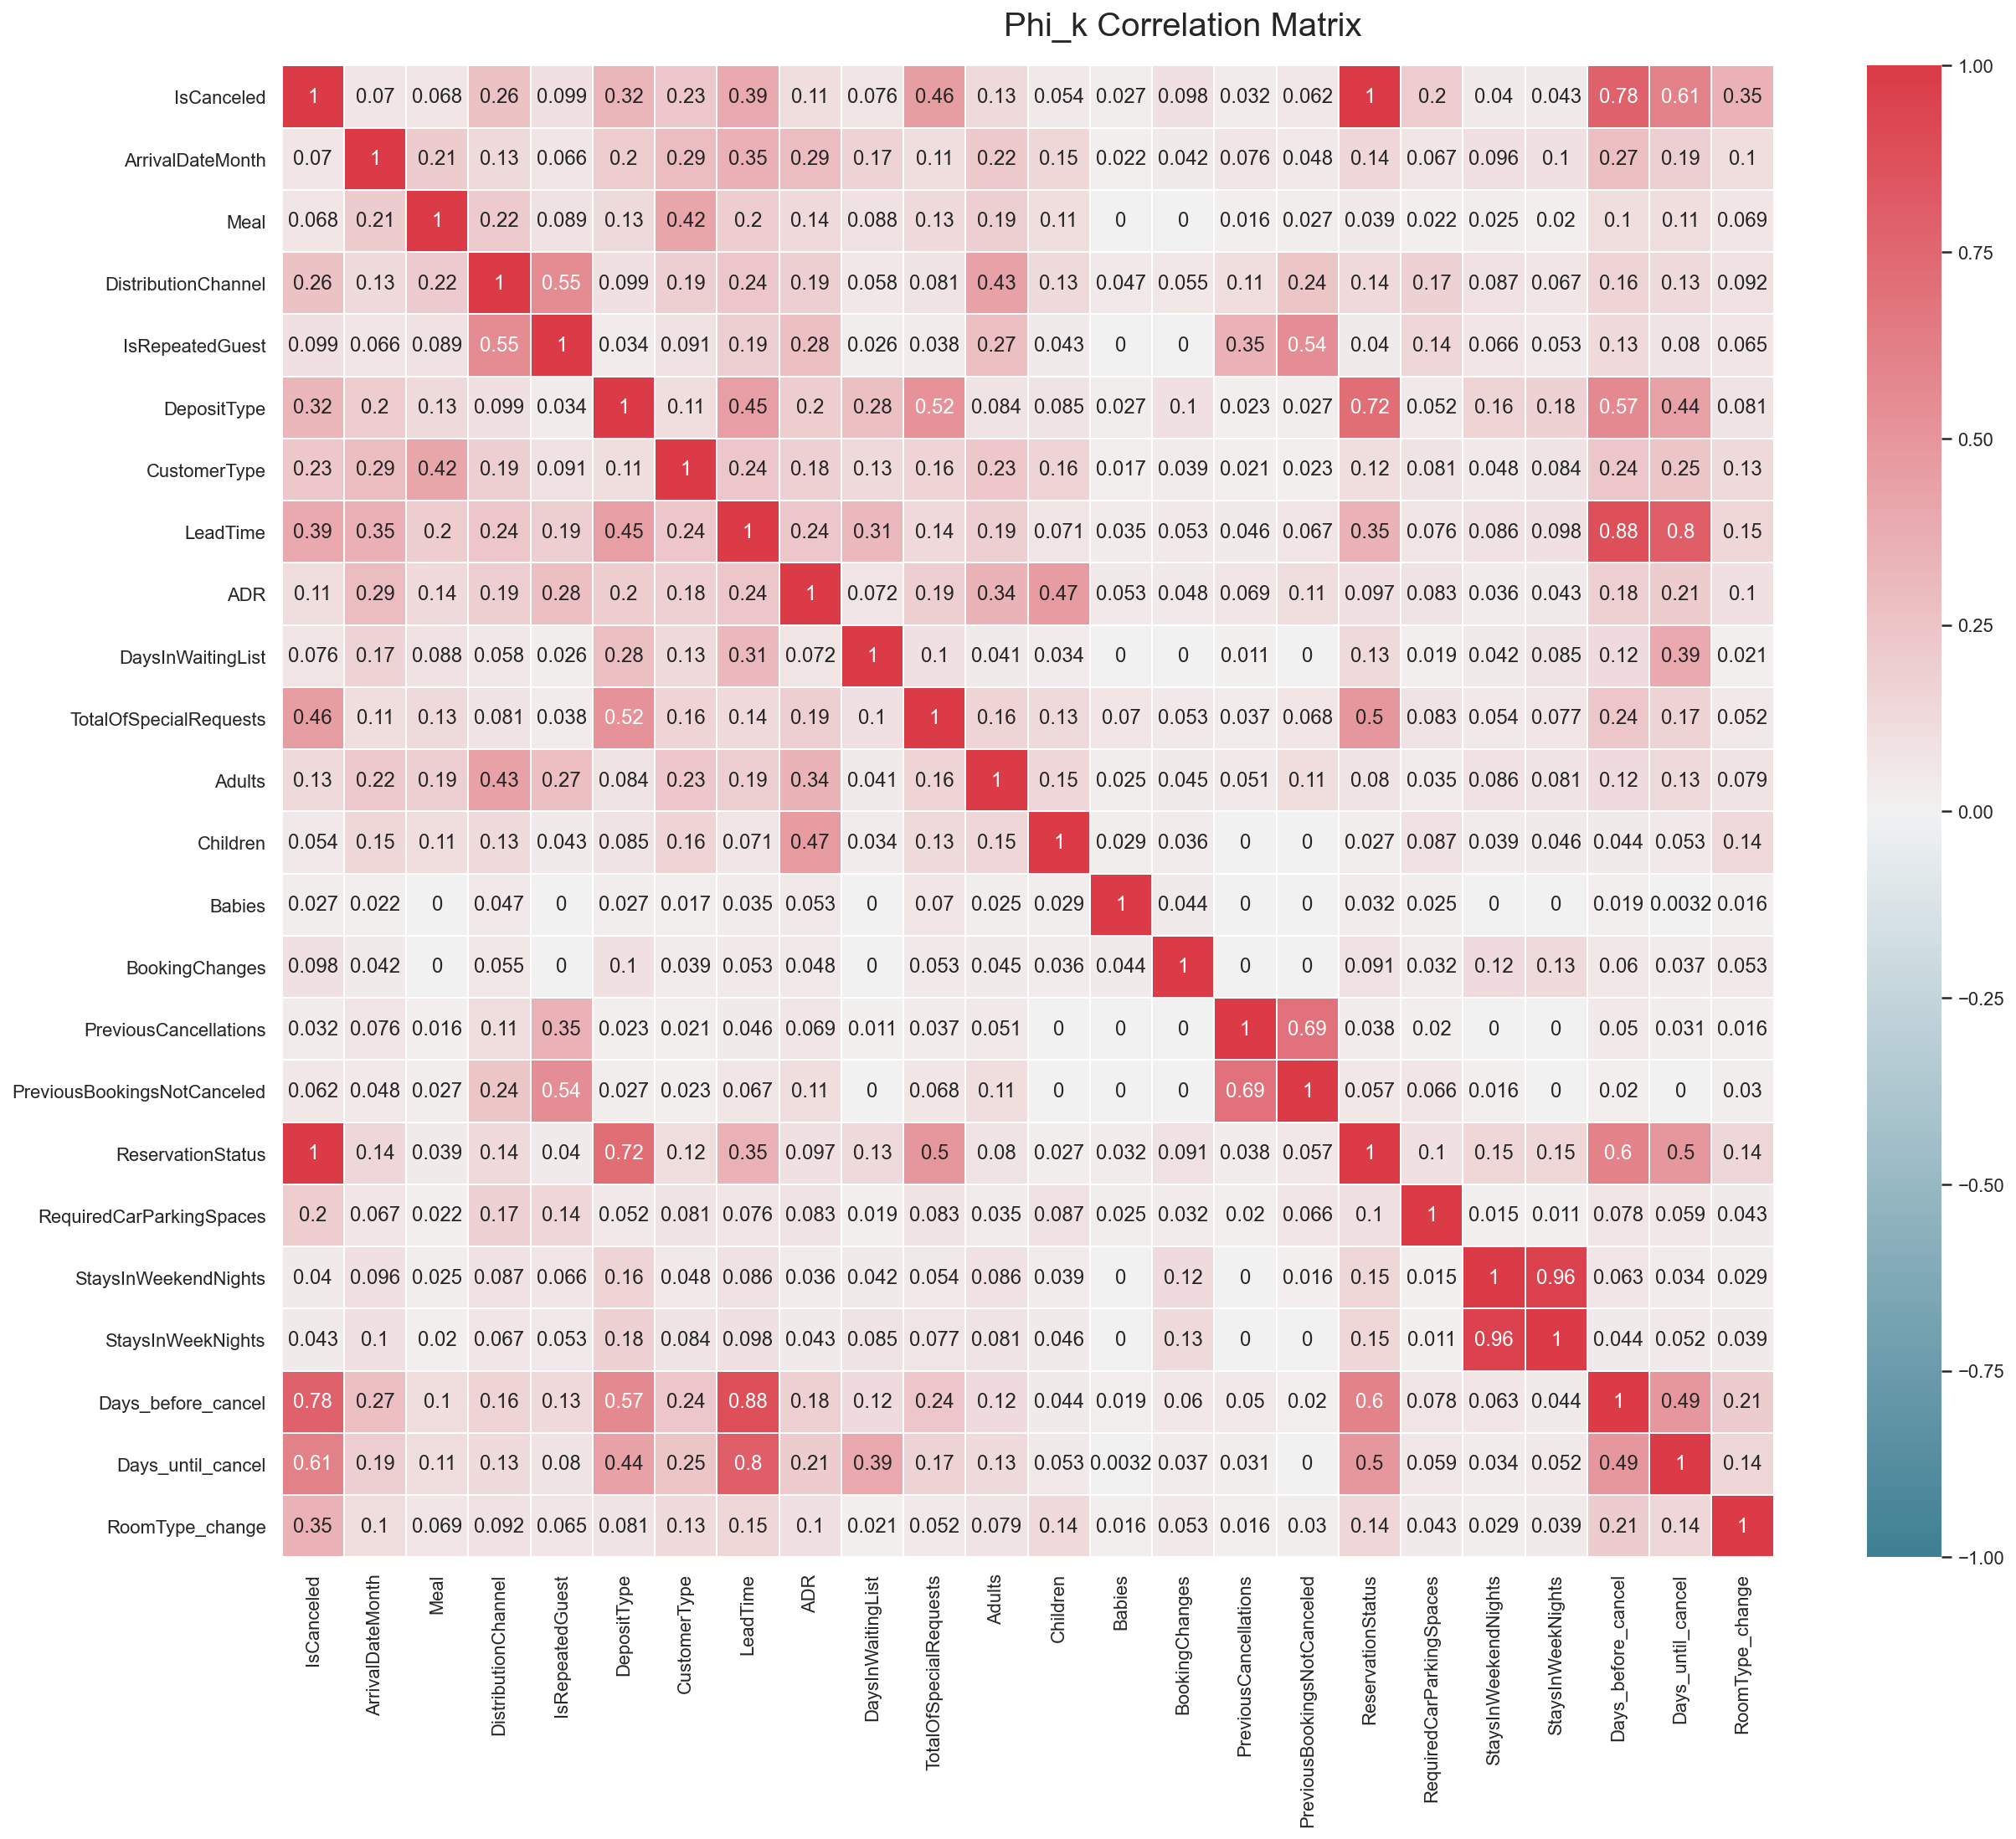

In [24]:
# Define features for Phi_K correlation
corr_features =['IsCanceled', 'ArrivalDateMonth', 'Meal', 'DistributionChannel', 'IsRepeatedGuest', 
                'DepositType', 'CustomerType', 'LeadTime', 'ADR', 'DaysInWaitingList', 'TotalOfSpecialRequests',
                'Adults', 'Children', 'Babies', 'BookingChanges', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                'ReservationStatus','RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights',
                'Days_before_cancel', 'Days_until_cancel', 'RoomType_change']
# Set correlation matrix
correlation2 = df1[corr_features].phik_matrix()
# Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation2, annot = correlation2.values, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Phi_k Correlation Matrix", fontsize=20)

plt.show()

### Clean data

In [25]:
# Dropping the variables with high correlation
df1.drop(['MarketSegment', 'ReservedRoomType', 'Agent', 'Company', 'ReservationStatusDate', 'AssignedRoomType' ], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78919 entries, 0 to 79329
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   78919 non-null  int64  
 1   LeadTime                     78919 non-null  int64  
 2   ArrivalDateMonth             78919 non-null  object 
 3   StaysInWeekendNights         78919 non-null  int64  
 4   StaysInWeekNights            78919 non-null  int64  
 5   Adults                       78919 non-null  int64  
 6   Children                     78919 non-null  float64
 7   Babies                       78919 non-null  int64  
 8   Meal                         78919 non-null  object 
 9   DistributionChannel          78919 non-null  object 
 10  IsRepeatedGuest              78919 non-null  int64  
 11  PreviousCancellations        78919 non-null  int64  
 12  PreviousBookingsNotCanceled  78919 non-null  int64  
 13  BookingChanges  

In [26]:
#re-define non_metric and metric due to drop columns
# Define metric features (INCLUIR AS VARIAVEIS CRIADAS)
metric_features = ['LeadTime', 'ADR', 'DaysInWaitingList', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                   'StaysInWeekendNights', 'StaysInWeekNights','Days_before_cancel', 'Days_until_cancel']

# Define non-metric features
non_metric_features = df1.columns.drop(metric_features).to_list()

In [27]:
#Check the size of dataset
df1.shape

(78919, 24)

In [28]:
#Look at the data
df1.head()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,Days_before_cancel,Days_until_cancel,RoomType_change
0,0,6,July,0,2,1,0.0,0,HB,TA/TO,0,0,0,0,No Deposit,0,Transient,0.0,0,0,Check-Out,0,0,1
1,1,88,July,0,4,2,0.0,0,BB,TA/TO,0,0,0,0,No Deposit,0,Transient,76.5,0,1,Canceled,0,88,1
2,1,65,July,0,4,1,0.0,0,BB,TA/TO,0,0,0,0,No Deposit,0,Transient,68.0,0,1,Canceled,62,3,1
3,1,92,July,2,4,2,0.0,0,BB,TA/TO,0,0,0,0,No Deposit,0,Transient,76.5,0,2,Canceled,8,84,1
4,1,100,July,0,2,2,0.0,0,BB,TA/TO,0,0,0,0,No Deposit,0,Transient,76.5,0,1,Canceled,91,9,1


### Visualization

In [ ]:
# Percentage of y='yes'(only for classification)
(df['IsCanceled']==1).value_counts(normalize=True)

In [ ]:
#Only for classification
sns.set_style('white')
sns.countplot(x='IsCanceled',data= df1,palette = "Reds")

In [ ]:
# Absolute frequencies for the non-metric features
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(5, ceil(len(non_metric_features) / 5), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot
for ax, feat in zip(axes.flatten(), non_metric_features):
    g = sns.countplot(df1[feat], ax=ax, palette = 'cubehelix')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Layout
# Add a centered title to the figure:
title = "Categorical Variables"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.8)

#Show plot

plt.show()

In [ ]:
# Histograms for the metric features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df1[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
#axes.flatten()[-1].remove()

#Show Plot
plt.show()

In [ ]:
# Density plots for the metric features
sns.set()

# set desity plot and layout
df1[metric_features].plot(kind='density', subplots=True, figsize=(20,20),sharex=False)
plt.subplots_adjust(top=0.95)

# Layout
# Add a centered title to the figure:

plt.suptitle("Density plots of numerical data", fontsize=15)

#Adjust the space between plots
plt.subplots_adjust(hspace=0.5)

#Show Plot
plt.show()

In [ ]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"
plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

# Show plots
plt.show()

In [ ]:
# Pairwise relationship of metric features
sns.set()

# Setting pairplot
sns.pairplot(data=df1[metric_features], diag_kind="hist")

# Layout
# Add a centered title to the figure
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# Show plots
plt.show()

In [ ]:
#Create visualizations separated by categorical target (ONLY WORK FOR CLASSIFICATION PROBLEMS -target values 0 or 1)
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("IsCanceled")

for feature in non_metric_features2:
    cont_tab = pd.crosstab(df1[feature], df1['IsCanceled'], margins = True)
    categories = cont_tab.index[:-1]
    obs_pct = np.array([(np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values))*100, 
                        (np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values))*100])
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="royalblue")
    plt.legend((p2[0], p1[0]), ('1', '0'))
    plt.title(feature, size = 16)
    plt.xticks(rotation=65, size = 16,ha = 'right')
    plt.show()

In [ ]:
#Create visualizations separated by categorical target (ONLY WORK FOR CLASSIFICATION PROBLEMS -target values 0 or 1)
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("IsCanceled")

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features2) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), non_metric_features2):
    data = df1.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='IsCanceled', ax=ax, palette = "RdBu")

#Add a title to the plot
title = "Categorical Variables - Relative Frequencies by Target"
plt.suptitle(title)
#Adjust the rotation of xlabels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)

#Adjust the space between the plots
plt.subplots_adjust(wspace=0.3, hspace=0.7)

#Remove the last graphic
axes.flatten()[-1].remove()
#axes.flatten()[-2].remove()
plt.show()

In [ ]:
# All Numeric Variables' Box Plots in one figure separated by target
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df1['IsCanceled'], y=df1[feat], ax=ax,palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

# Remove the last graphic
axes.flatten()[-1].remove()

plt.show()

## Data Preparation:

### Dealing with Outliers

In [ ]:
# Histograms for the metric features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df1[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)
#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()

#Show Plot
plt.show()

In [ ]:
# Density plots for the metric features
sns.set()

# set desity plot and layout
df1[metric_features].plot(kind='density', subplots=True, figsize=(20,20),sharex=False)
plt.subplots_adjust(top=0.95)
plt.suptitle("Density plots of numerical data", fontsize=15)
#Adjust the space between plots
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) /4), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-2].remove()
axes.flatten()[-1].remove()
# Show plots
plt.show()

In [ ]:
#Standardize the data to run the outliers methods
#Select data
outliers_features = ['LeadTime', 'ADR', 'DaysInWaitingList', 'StaysInWeekendNights', 'StaysInWeekNights',
                     'Days_before_cancel', 'Days_until_cancel']
df1_out = df1[outliers_features].copy()
# Create a StandardScaler
scale = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scale_feat= scale.fit_transform(df1_out[outliers_features])
#Applying the transformation in the dataset
df1_out[outliers_features]=scale_feat
#Check the results
df1_out.head()

In [ ]:
#Check the statistics summary to check it worked
df1_out.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

#### We use 6 methods to recognize outliers:

In [ ]:
#1) Zscore that checks how many standard deviations is a datapoint distant from the mean;
def out_zscore(df, threshold = 3.0):
    z = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns, index = df.index)
    z = pd.DataFrame(z > threshold)
    return z.any(axis = 1).astype(int)

In [ ]:
#2) InterQuantile Range method that creates boundaries using the first and thirs quantile and the interquantile range;
def out_iqr(df, multiplier = 3.0):
    q75 = df.quantile(0.75, axis = 0)
    q25 = df.quantile(0.25, axis = 0)
    iqr = q75 - q25
    lower_bound = q25 - multiplier*iqr
    upper_bound = q75 + multiplier*iqr
    return df.apply(lambda x: np.any((x<lower_bound) | (x>upper_bound)), 1).astype(int)

#### 3) Local Outlier Factor (LOF) is a function that detects outliers by comparing the density of the neighborhood of a point to the ones of its neighbors.

In [ ]:
lof = LocalOutlierFactor(contamination = 'auto',metric = 'euclidean',n_neighbors=1)
lof_out = pd.Series(lof.fit_predict(df1_out), index = df1_out.index)
lof_out.value_counts(normalize = True)

#### 4) At the basis of the Isolation Forest algorithm there is the tendency of anomalous instances in a dataset to be easier to separate from the rest of the sample (isolate), compared to normal points. In order to isolate a data point the algorithm recursively generates partitions on the sample by randomly selecting an attribute and then randomly selecting a split value for the attribute, between the minimum and maximum values allowed for that attribute. When all the trees are grown outliers are identified as points easier to isolate, therefore with a smaller path lenght in the tree, being closer to the root.

In [ ]:
isolation_forest = IsolationForest(random_state = 7, contamination=  "auto")
isolation_forest.fit(df1_out) #same results with scaled
isofor_outliers = pd.Series(isolation_forest.predict(df1_out), index = df1_out.index)
isofor_outliers.value_counts(normalize = True)

#### 5) One-Class SVM is similar to support vector machine, but instead of using a hyperplane to separate two classes of instances, it uses a hypersphere to encompass all of the instances. The algorithm will try to find the smallest possible hypersphere and point outside of it will be considered outliers. One bad thing of this algorithm is that you have to set in advance the percentage of points that you think are outliers, in this case I use the one retrieved from LOF.

In [ ]:
outliers_fraction =   0.063
auto_detection = svm.OneClassSVM(kernel='rbf', gamma=0.01, degree=3, nu=outliers_fraction)
auto_detection.fit(df1_out)
svm_outliers = pd.Series(auto_detection.predict(df1_out), index = df1_out.index)
svm_outliers.value_counts(normalize = True)

#### 6) DBSCAN set a point p and the density around a point can be measured by the number of points surrounding it. To measure the density around a point p, it used the topological definition of neighborhood. The 𝜀-neighborhood of a point p is the space within a radius 𝜀 > 0 centered in p. For this algorithm, it's necessary set the minimal number of points in each neighborhood (min_samples) and the size of the radius (area) of neighborhood (eps). It's considered a core point when a point there is at least the minimal points around it into your radius. Not core points are points inside the radium of a core point, but they don't have the minimal number of points around them. The noise point are points they are neither a core point and not core point. We are interest in this analyse to detect the noise points. The 2 plots bellow are to find the eps to run the dbscan algorithm.  

In [ ]:
#Elbow plot to find the number of neighbors
inert = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1_out)
    inert.append(kmeanModel.inertia_)
#Define name for x axis and y axis
plt.xlabel("clusters")
plt.ylabel("avg_square distance")
plt.plot(K,inert,"o-",color="blue")

In [ ]:
# K-distance graph to find out the right eps value
#Use the number of neighbors detect in the elbow plot. 
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(df1_out)
distances, _ = neigh.kneighbors(df1_out)
distances = np.sort(distances[:, -1])
plt.plot(distances)
# plt.subplot(1.1,figsize=(20,15))
plt.figure(1, figsize=(20, 10))
plt.show()

In [ ]:
#After find the eps value, we run the DBSCAN algorithm
dbscan = DBSCAN(eps=2.5, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df1_out)
dbscan_outliers = pd.Series(dbscan.fit_predict(df1_out), index = df1_out.index)
dbscan_outliers.value_counts(normalize = True)

In [ ]:
#Including columns with the results of each method in the dataset to compare the different methods and also combine them.
df1_out['zscore'] = out_zscore(df1_out)

df1_out['iqr'] = out_iqr(df1_out, multiplier = 3.0)

df1_out['lof_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[lof_out[lof_out == -1].index, 'lof_out'] = 1

df1_out['isofor_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[isofor_outliers[isofor_outliers == -1].index, 'isofor_out'] = 1

df1_out['svm_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[svm_outliers[svm_outliers == -1].index, 'svm_out'] = 1

df1_out['dbscan_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[dbscan_outliers[dbscan_outliers != -1].index, 'dbscan_out'] = 0
df1_out.loc[dbscan_outliers[dbscan_outliers == -1].index, 'dbscan_out'] = 1

df1_out['sum_out']  = df1_out[['zscore','iqr','svm_out','lof_out','isofor_out','dbscan_out']].apply(lambda x: sum(x), axis = 1)

In [ ]:
#Create a dataset for see the outliers detect by each model
outliers = df1_out[['zscore','iqr','svm_out','lof_out','isofor_out','dbscan_out']]
outliers.groupby(['zscore','iqr','svm_out','lof_out','isofor_out','dbscan_out'])\
            .size()\
            .to_frame()

In [ ]:
#Show the number of outliers detect by z-score individually
df1_out['zscore'].value_counts()

In [ ]:
#Show the number of outliers detect by IQR individually
df1_out['iqr'].value_counts()

In [ ]:
#Show the number of outliers detect by combined methods. 
df1_out['sum_out'].value_counts()

In [ ]:
#Chose the number 4 with the best possible solution of combined methods
df1_out2 = df1.loc[df1_out.query('sum_out == 4').index]
df2 = df1.drop(index = df1_out.query('sum_out == 4').index)

In [ ]:
#Look at the results
df2

In [ ]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) /4), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df2[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-2].remove()
axes.flatten()[-1].remove()
# Show plots
plt.show()

#### After testing removing based on 4 combined methods and realising that did not seem to make a big difference on the box plots in terms of outliers, we have dropped this approach and decided to apply Inter quartile range (IQR) only on five features 

#### For the features Drywh, Freq the best multiplier is 1 and for the features Dessert,Sweetred,Sweetwh, the best multiplier is 4.5

In [ ]:
#Create a copy of the dataset
df1_iqr = df1.copy()
#Define the features to apply the IQR method
iqr_features= ['Drywh','Freq']
#Run the function setting the multiplier =1 and create a new columns to store the results
df1_iqr['out'] = out_iqr(df1_iqr[iqr_features], multiplier = 1)
#Show the results
df1_iqr['out'].value_counts()

In [ ]:
#Filter the data excluding the outliers detected
df1_iqr1 = df1_iqr[df1_iqr['out']==0]
#Create a dataset to store the outliers detected
df1_iqr_out = df1_iqr[df1_iqr['out']==1]
#Drop the column create in both datasets
df1_iqr1.drop(['out'], axis=1, inplace=True)
df1_iqr_out.drop(['out'], axis=1, inplace=True)

In [ ]:
#Second step
#Define the features to apply the IQR method
iqr_features2= ['Dessert','Sweetred','Sweetwh']
#Run the function setting the multiplier =4.5 and create a new columns to store the results
df1_iqr1['out'] = out_iqr(df1_iqr1[iqr_features2], multiplier = 4.5)
#Show the results
df1_iqr1['out'].value_counts()

In [ ]:
#Filter the data excluding the outliers detected
df1_iqr2 = df1_iqr1[df1_iqr1['out']==0]
#Create a dataset to the outliers detected
df1_iqr_out2 = df1_iqr1[df1_iqr1['out']==1]
#Drop the column create in both datasets
df1_iqr2.drop(['out'], axis=1, inplace=True)
df1_iqr_out2.drop(['out'], axis=1, inplace=True)

In [ ]:
print('Percentage of data kept after removing outliers:', np.round(df1_iqr2.shape[0] / df1.shape[0], 4))

In [ ]:
#Check the results
df1_iqr2.info()

In [ ]:
#Merging the both datasets used to store the outliers detected
df1_out_final = df1_iqr_out.append(df1_iqr_out2)

In [ ]:
#Check the outliers dataset
df1_out_final.info()

In [ ]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) /4), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1_iqr2[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-2].remove()
axes.flatten()[-1].remove()
# Show plots
plt.show()

In [ ]:
#Replace df1 by the method we decided
#IQR for the  5 variables. 
#df1 = df1_iqr2.copy()

In [ ]:
#Check the data
df1.info()

### Encoding categorical features

In [ ]:
# One hot encode categorical features
ohc_features = non_metric_features.copy()

ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(df1[ohc_features]),
                      index=df1.index,
                      columns=ohc.get_feature_names(ohc_features))
df1 = pd.concat([df1.loc[:, df1.columns.drop(ohc_features)], df_ohc], axis=1)

In [ ]:
#Show the results
df1

### Generate test design
The data will be splitted into train and test set with a corresponding size of 80 and 20 percent of the entire dataset. This split will be based on random stratified (preserving target relative frequencies) sampling. We will use a 5-fold cross-validation approach to evaluate each model 5 consecutive times and perform hyper-parameter tuning. Afterwards, we train the model on the entire train set with the best hyper-parameter configuration and use the test set to obtain a clean and unbiased estimate of the generalization capability of the model.

The model selection procedure will be based on a single measure: *precision* (proportion of correctly positive events from all events identified as positive). This measure was selected as one of the business goals is to increase the conversion rate of the marketing campaign. Therefore, the model that maximizes the *precision* will be selected.


In [ ]:
# Preparing the data
X = df1.drop(columns=['IsCanceled'])
y = df1.IsCanceled


In [ ]:
#Check the data
X.info()

In [ ]:
# Splitting the data
# Split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop('y', axis=1),
    df1['y'],
    stratify=df1['y'],
    test_size=0.2,
    random_state=0)

### Normalize data

In [ ]:
#Select data
features = df_preprocessed.columns
# Create a StandardScaler
scale = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scale_feat= scale.fit_transform(df_preprocessed[features])
#Applying the transformation in the dataset
df_preprocessed[features]=scale_feat
#Check the results
df_preprocessed.head()

In [ ]:
#Check the statistics summary
df_preprocessed.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

In [ ]:
#Export the pre processed data
df_preprocessed.to_csv(os.path.join("h2_preprocessed.csv"), index=False)